In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [5]:
data = pd.read_csv('microchip_tests.txt', names = ('test1','test2','released'))

In [6]:
data.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test1       118 non-null float64
test2       118 non-null float64
released    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [10]:
X = data.iloc[:,:2].values

In [12]:
X.shape

(118, 2)

In [13]:
y = data.iloc[:,2].values

In [17]:
plt.rcParams['figure.figsize'] = 10,8
sns.set()

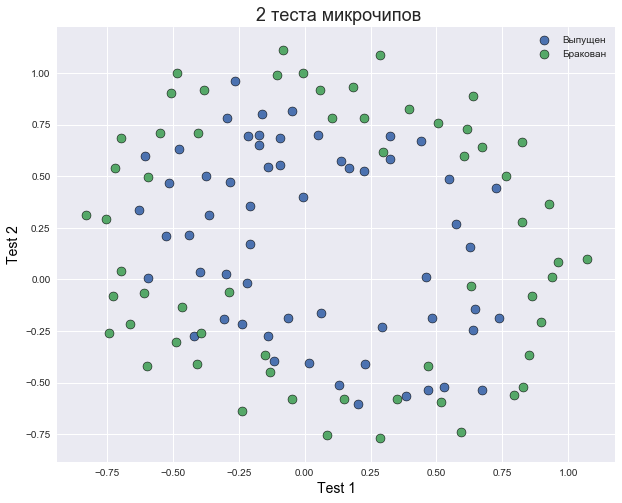

In [30]:
plt.scatter(X[y == 1,0], X[ y == 1, 1], s = 80, edgecolors='black', linewidths=0.5, label = 'Выпущен')
plt.scatter(X[y == 0,0], X[ y == 0, 1], s = 80, edgecolors='black', linewidths=0.5, label = 'Бракован')
plt.xlabel('Test 1', size = 14, color = 'black')
plt.ylabel('Test 2', size = 14, color = 'black')
plt.title(' 2 теста микрочипов', size = 18)
plt.legend(loc = 'best')

In [31]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step))

    # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [32]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

In [33]:
X_poly.shape

(118, 36)

In [42]:
C = 10000
logit = LogisticRegression(C = C, n_jobs= -1, random_state=17)
logit.fit(X_poly, y)

C:\Users\user_2018\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

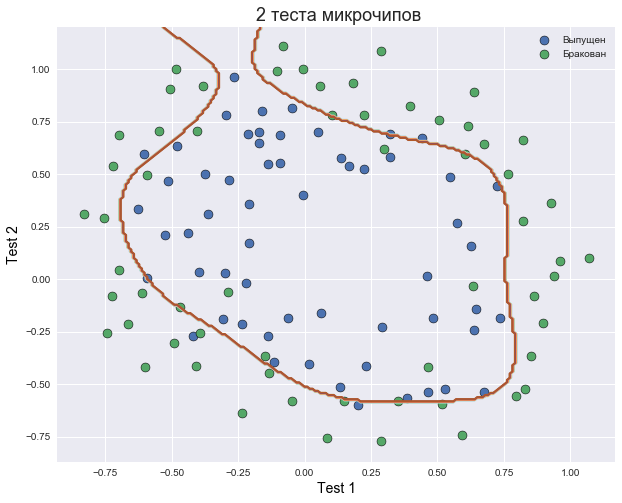

In [43]:
plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)
plt.scatter(X[y == 1,0], X[ y == 1, 1], s = 80, edgecolors='black', linewidths=0.5, label = 'Выпущен')
plt.scatter(X[y == 0,0], X[ y == 0, 1], s = 80, edgecolors='black', linewidths=0.5, label = 'Бракован')
plt.xlabel('Test 1', size = 14, color = 'black')
plt.ylabel('Test 2', size = 14, color = 'black')
plt.title(' 2 теста микрочипов', size = 18)
plt.legend(loc = 'best')

In [41]:
logit.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=17, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [44]:
stf = StratifiedKFold(n_splits=5,shuffle=True,random_state=17)

In [66]:
c_values = np.logspace(-2,10, 5000)

In [67]:
len(c_values)

5000

In [ ]:
logit_sear = LogisticRegressionCV(Cs=c_values, cv=stf,n_jobs=-1,verbose=1)
logit_sear.fit(X_poly,y)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.0min finished


In [58]:
logit_sear.C_

array([199.20457085])

(0.0, 10)

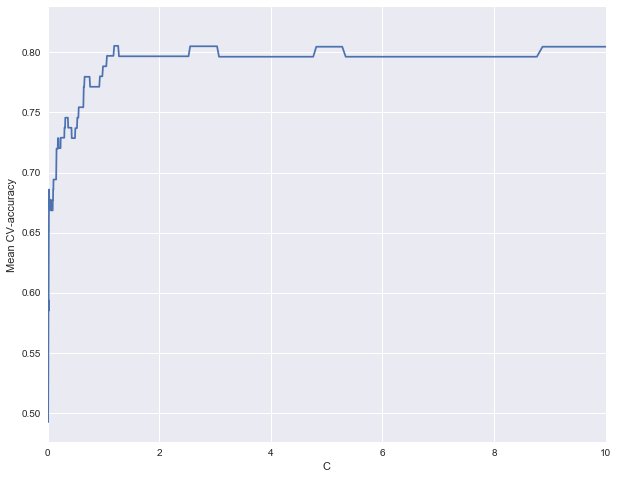

In [65]:
plt.plot(c_values, np.mean(logit_sear.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');
plt.xlim(0.,10)

In [64]:
logit_sear.scores_[1].shape

(5, 1000)